In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

In [ ]:
tol = 1e-9
iter_max=1000
a=1 
x=np.array([1.2,1.2] )#-1.2 #1
# parameters for backtracking line search
c = 0.1;
rho = 0.9;

In [ ]:
def hess(x):
    x1 = x[0]
    x2 = x[1]
    H = np.array([[1200*x1**2-400*x2+2,-400*x1],[-400*x1,200]])
    return H

def pot(x):
    x1 = x[0]
    x2 = x[1]
    f = 100*(x2-x1**2)**2+(1-x1)**2
    return f

def grad(x):
    x1 = x[0]
    x2 = x[1]
    g = np.array([400*x1**3-400*x1*x2+2*x1-2,200*(x2-x1**2)])
    return g

In [ ]:
def descend(x,direction=1):
    
    f=pot(x)
    g=grad(x)
    x_old=np.zeros(len(x))
    g_old=np.zeros(len(g))
    B=np.eye(len(x))
    
    norm_g = np.linalg.norm(g)
    print("Initially, f = ",f,", ||grad f|| = ",norm_g)
    
    fvals = np.zeros(iter_max)
    fvals[0] = f
    ngvals = np.zeros(iter_max)
    ngvals[0] = norm_g
    avals=np.zeros(iter_max)
    avals[0] = 1 #fix this awful hardcoding
    xvals = np.zeros((iter_max,len(x)))
    xvals[0] = x
    
    itr = 1
    
    while (norm_g > tol and itr < iter_max): 
        #choose search direction
        if( direction == 0): # steepest descent
            p = -g
            dir = "SD"
        elif( direction == 1): # Newton
            H = hess(x)
            p = np.linalg.solve(H,-g) 
            # if( np.dot(g,p) < 0 ): # descent direction
                # dir = "Newton"            
    #         print(np.linalg.eigvals(H))
            spd = np.all(np.linalg.eigvals(H) > 0)
            if( spd ): # H is SPD, use Newton's direction
                p = np.linalg.solve(H,-g) 
                dir = "Newton"
            else: # use the steepest descent direction
                p = -g
                dir = "SD";
        elif( direction == 2): # BFGS
            s=x-x_old
            y=g-g_old
            # if iter%20 == 0:
            #     print('iter = ',iter)
            #     B=np.eye(len(x))
            B=B-(np.outer(B.dot(s),B.dot(s)))/(s.dot(B).dot(s))+(np.outer(y,y))/(y.dot(s))
            
            spd = np.all(np.linalg.eigvals(B) > 0)
            if( spd ): # H is SPD, use BFGS direction
                p = np.linalg.solve(B,-g) 
                # print('B-H_norm', np.linalg.norm(B-H))
                dir = "BFGS"
            else: # use the steepest descent direction
                p = -g
                dir = "SD";
            
        else:
            print("direction is out of range")
            break
        # normalize the search direction if its length greater than 1
        norm_p = np.linalg.norm(p)
        if( norm_p > 1):
            p = p/norm_p
        # do backtracking line search along the direction p
        a = 1 # initial step length
        f_temp = pot(x + a*p)
        cpg = c*np.dot(p,g)
    #     print("cpg = ",cpg,"f = ",f,"f_temp = ",f_temp)
        while( f_temp > f + a*cpg ): # check Wolfe's condition 1
            a = a*rho
            if( a < 1e-14 ):
                print("line search failed\n");
                itr = iter_max - 1
                break
            f_temp = pot(x + a*p)        
    #         print("f_temp = ",f_temp)
        x_old=x
        g_old=g
        x = x + a*p
        f = pot(x)
        g = grad(x)
        norm_g = np.linalg.norm(g)
    #     print("iter ",iter,": dir = ",dir,", f = ",f,", ||grad f|| = ",norm_g,", step length = ",a)
    #     if dir == "BFGS":
    #     print(f"iter {iter}: dir = {dir}, f = {f:.6f}, ||grad f|| = {norm_g:.6e}, step length = {a:.3e}")
        if( itr%100 == 0):
            # restore all coordinates
            #xyz = LJvector2array(x)
            print('iter = ', itr)
            # drawconf(xyz,0.5*rstar)
        fvals[itr] = f
        ngvals[itr] = norm_g
        avals[itr] = a
        xvals[itr] = x
    
        itr = itr + 1
    print(f"Result: f = {f:.10f}, ||grad f|| = {norm_g:.6e}")
    print('iter = ', itr)
    return (fvals, ngvals, avals, xvals, itr)
        

Initially, f =  5.8 , ||grad f|| =  125.16932531574973
iter =  100
iter =  200
iter =  300
iter =  400
iter =  500
iter =  600
iter =  700
iter =  800
iter =  900
Result: f = 0.0034487887, ||grad f|| = 1.173181e-01
iter =  1000
Initially, f =  5.8 , ||grad f|| =  125.16932531574973
Result: f = 0.0000000000, ||grad f|| = 2.056256e-10
iter =  8
Initially, f =  5.8 , ||grad f|| =  125.16932531574973
Result: f = 0.0000000000, ||grad f|| = 3.342085e-10
iter =  22
Initially, f =  24.199999999999996 , ||grad f|| =  232.86768775422658
iter =  100
iter =  200
iter =  300
iter =  400
iter =  500
iter =  600
iter =  700
iter =  800
iter =  900
Result: f = 0.0161138706, ||grad f|| = 3.427853e-01
iter =  1000
Initially, f =  24.199999999999996 , ||grad f|| =  232.86768775422658
Result: f = 0.0000000000, ||grad f|| = 1.093920e-10
iter =  21
Initially, f =  24.199999999999996 , ||grad f|| =  232.86768775422658
Result: f = 0.0000000000, ||grad f|| = 3.362494e-12
iter =  41


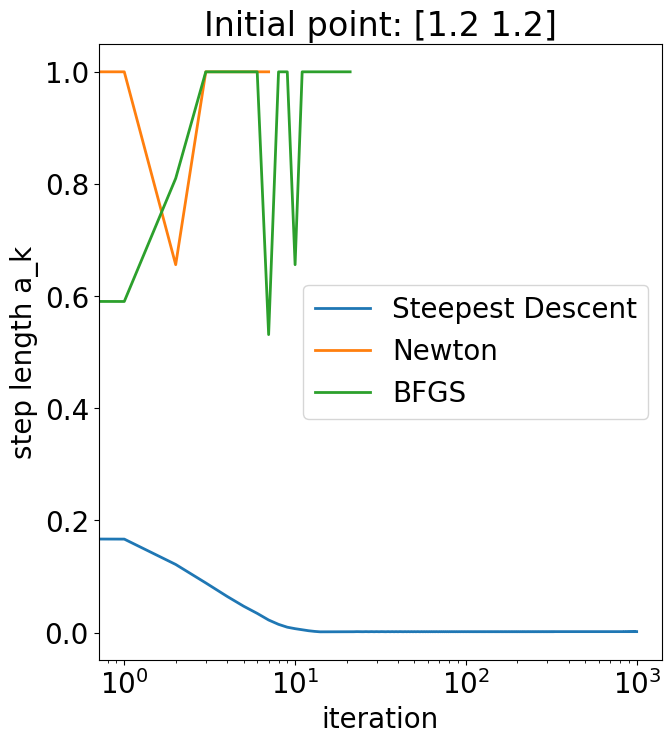

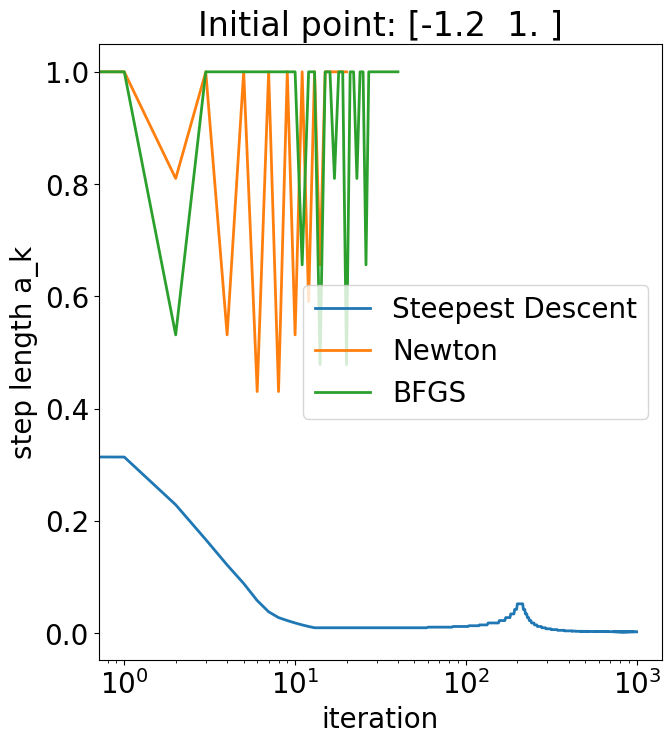

In [66]:
initial_list=np.array([[1.2,1.2],[-1.2,1]])
for idx, initial in enumerate(initial_list):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(16,8))
    plt.subplot(1, 2, idx+1)
    direction_dict = {0:"Steepest Descent",1:"Newton",2:"BFGS"} #,
    for direction in direction_dict:
        fvals, ngvals, avals, xvals, itr =descend(initial,direction)
        plt.plot(np.arange(itr),avals[0:itr],linewidth = 2, label=direction_dict[direction])
    plt.title(f"Initial point: {initial}")
    plt.xlabel("iteration")
    plt.xscale("log")
    plt.ylabel("step length a_k")
    plt.legend()

Initially, f =  5.8 , ||grad f|| =  125.16932531574973
iter =  100
iter =  200
iter =  300
iter =  400
iter =  500
iter =  600
iter =  700
iter =  800
iter =  900
Result: f = 0.0034487887, ||grad f|| = 1.173181e-01
iter =  1000
Initially, f =  5.8 , ||grad f|| =  125.16932531574973
Result: f = 0.0000000000, ||grad f|| = 2.056256e-10
iter =  8
Initially, f =  5.8 , ||grad f|| =  125.16932531574973
Result: f = 0.0000000000, ||grad f|| = 3.342085e-10
iter =  22
Initially, f =  24.199999999999996 , ||grad f|| =  232.86768775422658
iter =  100
iter =  200
iter =  300
iter =  400
iter =  500
iter =  600
iter =  700
iter =  800
iter =  900
Result: f = 0.0161138706, ||grad f|| = 3.427853e-01
iter =  1000
Initially, f =  24.199999999999996 , ||grad f|| =  232.86768775422658
Result: f = 0.0000000000, ||grad f|| = 1.093920e-10
iter =  21
Initially, f =  24.199999999999996 , ||grad f|| =  232.86768775422658
Result: f = 0.0000000000, ||grad f|| = 3.362494e-12
iter =  41


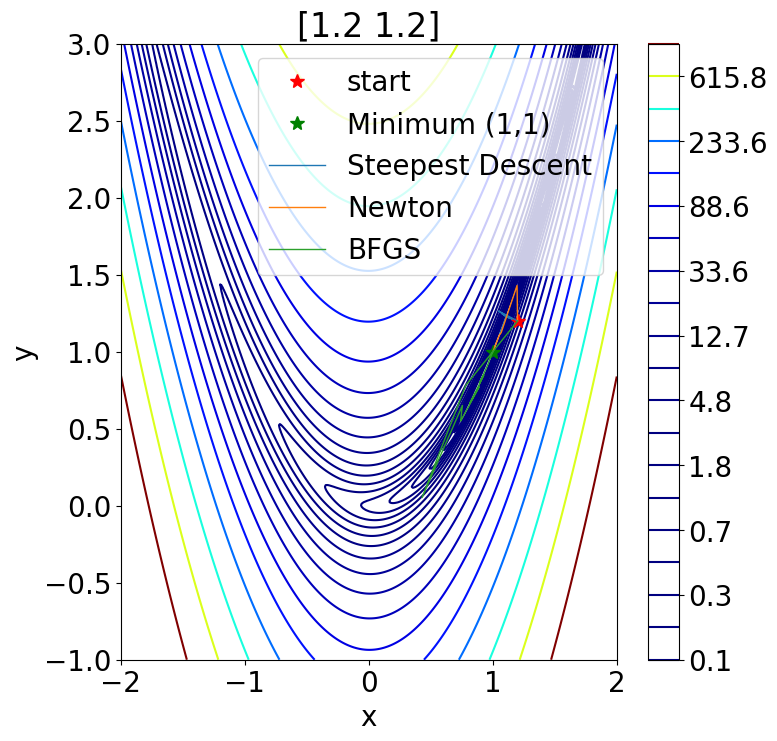

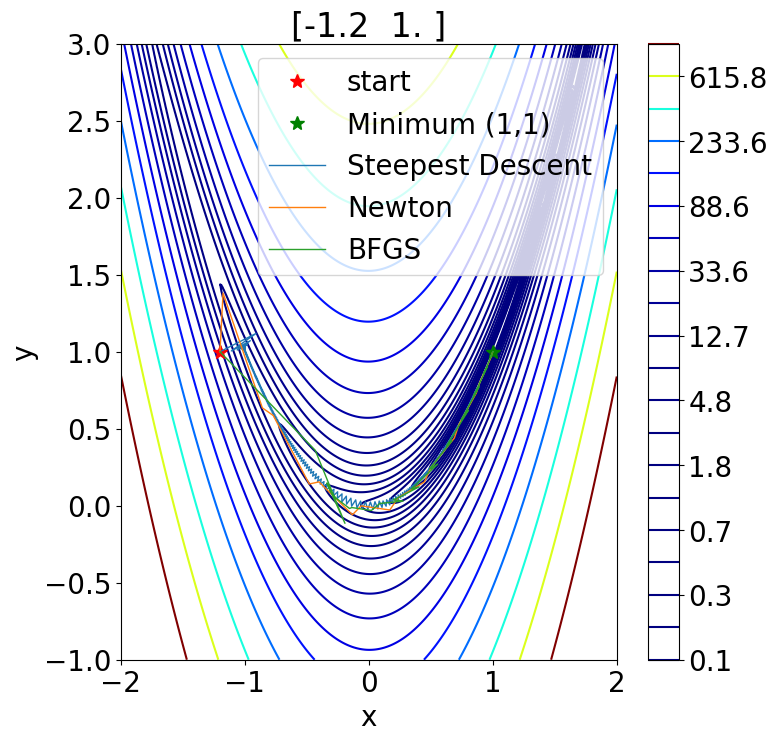

In [64]:
initial_list=np.array([[1.2,1.2],[-1.2,1]])
for idx, initial in enumerate(initial_list):
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    def rosenbrock(x, y):
        return (1 - x)**2 + 100 * (y - x**2)**2
    Z = rosenbrock(X, Y) # will this work? no it won't
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    contour = plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap="jet")
    plt.colorbar(contour)
    plt.plot(initial[0], initial[1], 'r*', markersize=10, label="start") #fixme hardcoding intial point
    plt.plot(1, 1, 'g*', markersize=10, label="Minimum (1,1)")
    
    # descend(x,direction=2)
    
    direction_dict = {0:"Steepest Descent",1:"Newton",2:"BFGS"} #
    for direction in direction_dict:
        fvals, ngvals, avals, xvals, itr =descend(initial,direction)
        # print(xvals[:22])
        # Plot the gradient descent path
        plt.plot(xvals[:itr,0],xvals[:itr,1], markersize=3, linewidth=1, label=direction_dict[direction])
    plt.title(f"{initial}")#,{direction_dict[direction]"
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

Initially, f =  5.8 , ||grad f|| =  125.16932531574973
iter =  100
iter =  200
iter =  300
iter =  400
iter =  500
iter =  600
iter =  700
iter =  800
iter =  900
Result: f = 0.0034487887, ||grad f|| = 1.173181e-01
iter =  1000
(1000,) (1000,)
Initially, f =  5.8 , ||grad f|| =  125.16932531574973
Result: f = 0.0000000000, ||grad f|| = 2.056256e-10
iter =  8
(8,) (8,)
Initially, f =  5.8 , ||grad f|| =  125.16932531574973
Result: f = 0.0000000000, ||grad f|| = 3.342085e-10
iter =  22
(22,) (22,)
Initially, f =  24.199999999999996 , ||grad f|| =  232.86768775422658
iter =  100
iter =  200
iter =  300
iter =  400
iter =  500
iter =  600
iter =  700
iter =  800
iter =  900
Result: f = 0.0161138706, ||grad f|| = 3.427853e-01
iter =  1000
(1000,) (1000,)
Initially, f =  24.199999999999996 , ||grad f|| =  232.86768775422658
Result: f = 0.0000000000, ||grad f|| = 1.093920e-10
iter =  21
(21,) (21,)
Initially, f =  24.199999999999996 , ||grad f|| =  232.86768775422658
Result: f = 0.0000000000,

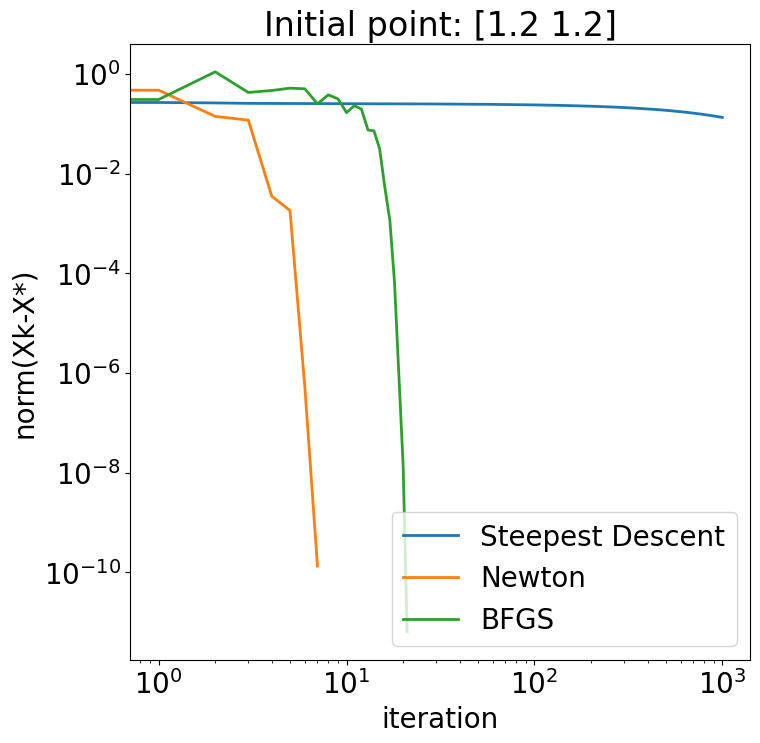

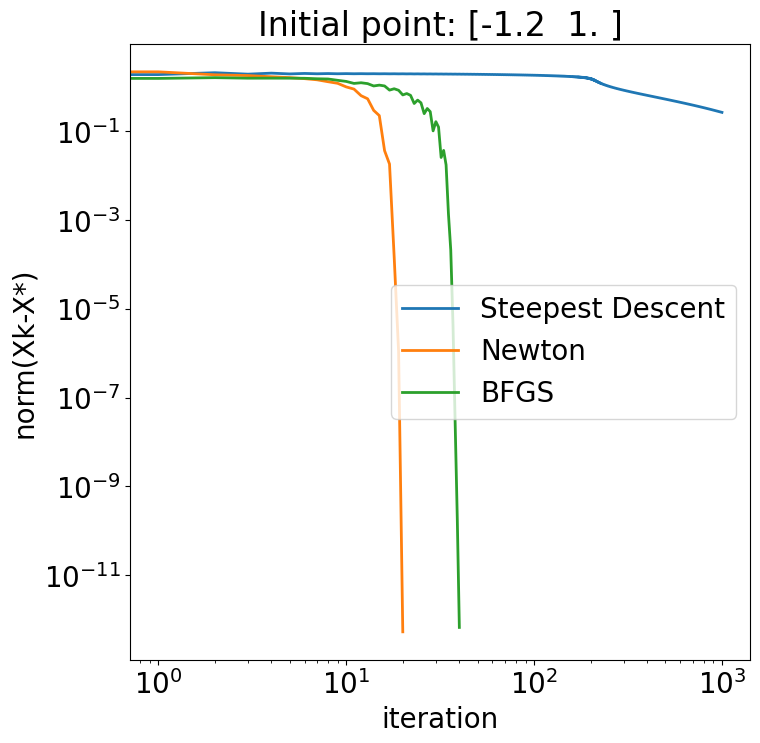

In [68]:
initial_list=np.array([[1.2,1.2],[-1.2,1]])
for idx, initial in enumerate(initial_list):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    direction_dict = {0:"Steepest Descent",1:"Newton",2:"BFGS"} #
    for direction in direction_dict:
        fvals, ngvals, avals, xvals, itr =descend(initial,direction)
        resvals=np.zeros(xvals.shape)
        resvals[:itr,0] = xvals[:itr,0] -1 
        resvals[:itr,1]= xvals[:itr,1]-1
        print(np.arange(itr).shape,np.linalg.norm(resvals[:itr], axis=1).shape)
        plt.plot(np.arange(itr),np.linalg.norm(resvals[:itr], axis=1),linewidth = 2, label=direction_dict[direction])
        #fixme: deal with zeros() becomeing -1. 
    plt.title(f"Initial point: {initial}")
    plt.xlabel("iteration")
    plt.xscale("log")
    plt.ylabel("norm(Xk-X*)")
    plt.yscale("log")
    plt.legend()